In [36]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#We read the files

# covidmap=gpd.read_file("../data/comarques_1M/divisions-administratives-v2r1-comarques-1000000-20250730.shp")
covidmap=gpd.read_file("../data/comarques_5K/divisions-administratives-v2r1-comarques-5000-20250730.shp")
covid=pd.read_csv("../data/covid.csv")




In [37]:
# Simplify geometry (reduce points)
# covidmap["geometry"] = covidmap["geometry"].simplify(tolerance=500, preserve_topology=True)



covid=covid.rename(columns={"ComarcaCodi": "CODICOMAR"})

print(covid.columns)
print(covidmap.columns)


covid_comarca = covid[["CODICOMAR", "NumCasos"]].groupby("CODICOMAR")["NumCasos"].sum().reset_index()
covid_comarca.head(30)



Index(['TipusCasData', 'CODICOMAR', 'ComarcaDescripcio', 'MunicipiCodi',
       'MunicipiDescripcio', 'DistricteCodi', 'DistricteDescripcio',
       'SexeCodi', 'SexeDescripcio', 'TipusCasDescripcio', 'NumCasos'],
      dtype='object')
Index(['CODICOMAR', 'NOMCOMAR', 'CAPCOMAR', 'AREAC5000', 'geometry'], dtype='object')


,CODICOMAR,NumCasos
0,1.0,13778
1,2.0,43066
2,3.0,38196
3,4.0,6631
4,5.0,1197
5,6.0,41511
6,7.0,67454
7,8.0,67904
8,9.0,23932
9,10.0,40622


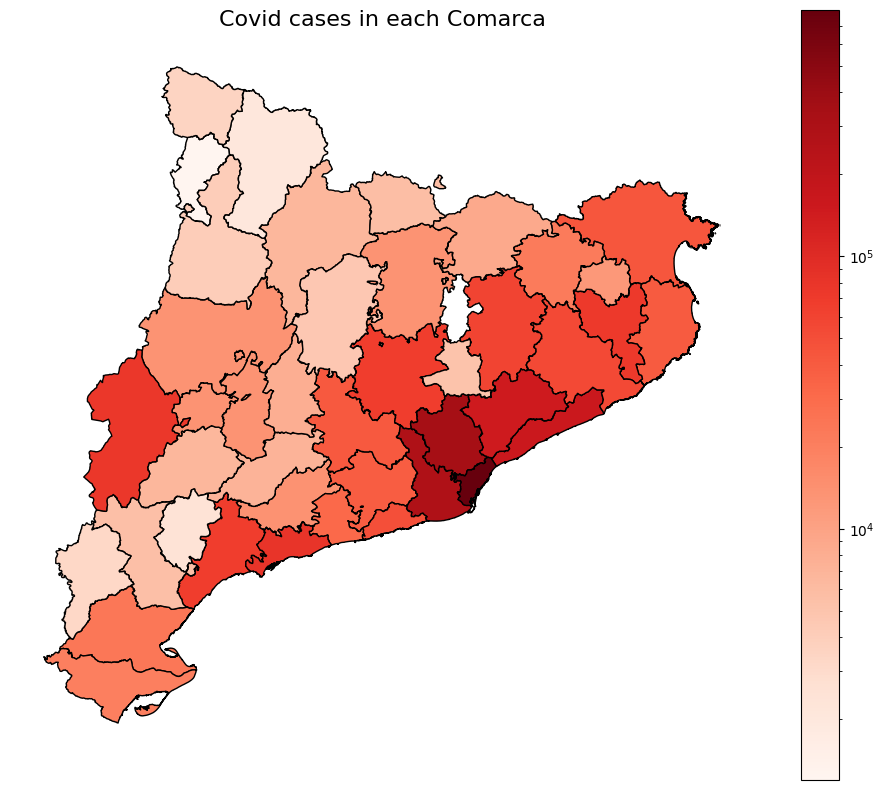

In [38]:
from matplotlib.colors import LogNorm

covid_comarca=covid_comarca.dropna()
covid_comarca['CODICOMAR']=covid_comarca['CODICOMAR'].astype(float).astype(int).astype(str)
covid_comarca['CODICOMAR']=covid_comarca['CODICOMAR'].str.zfill(2)
covidmap['CODICOMAR']=covidmap['CODICOMAR'].astype(str).str.zfill(2)
covidmap_covid=covidmap.merge(covid_comarca, on="CODICOMAR", how="left")

ax=covidmap_covid.plot(
 column="NumCasos",
 cmap="Reds",
 legend=True,
 edgecolor="black",
 figsize=(12,10),
 norm= LogNorm(vmin=covidmap_covid["NumCasos"].min(),
                 vmax=covidmap_covid["NumCasos"].max())
)

ax.set_title("Covid cases in each Comarca", fontsize=16)
ax.set_axis_off()
plt.show()

In [39]:
covidmap_covid["NumCasos"].describe()
print("Zeros:", (covidmap_covid["NumCasos"] == 0).sum())
print("Negative:", (covidmap_covid["NumCasos"] < 0).sum())
print("NaN:", covidmap_covid["NumCasos"].isna().sum())

Zeros: 0
Negative: 0
NaN: 1
